## A minimum example of applying a Bayesian logistic regression classifier on the test data in case study 4

This notebook construct a minimum example of how to use a Bayesian logistic regression classifier to compute prediction probability on the test data. We provide code for the following *tasks*
 - load the test csv file using `pandas`
 - A little bit of data wrangling to get the feature matrix $\mathbf{X}$ and true label $\mathbf{y}$
 - Draw random samples of logistic regression model parameters $\mathbf{w}$ from a given Gaussian distribution

In [1]:
import numpy as np
import pandas as pd
import scipy.special as special
import scipy.stats as stat
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# if using colab use this, otherwise comment out the next 2 lines, and then change the training_data_file and test_data_file to be where you have saved the data files.
# from google.colab import drive
# drive.mount('/content/drive')

# Relapce the path accordingly 
training_data_file = "epi_stroma_training_data.csv"
test_data_file = "epi_stroma_test_data.csv"

## Use `pandas` to load the test data as a data frame

In [3]:
test_data = pd.read_csv(test_data_file, delimiter=',')
test_data

,EpiOrStroma,Mean.Layer.1,Mean.Layer.2,Mean.Layer.3,Standard.deviation.Layer.1,Standard.deviation.Layer.2,Standard.deviation.Layer.3,Skewness.Layer.1,Skewness.Layer.2,Skewness.Layer.3,...,GLCM.Mean..quick.8.11..Layer.1..all.dir..,GLCM.StdDev..quick.8.11..Layer.1..all.dir..,GLCM.Correlation..quick.8.11..Layer.1..all.dir..,Number.of.sub.objects.Nucleus..1.,Number.of.sub.objects.Dark..1.,Area.of.sub.objects.Nucleus..1...Pxl.,Area.of.sub.objects.Dark..1...Pxl.,Rel..area.of.sub.objects.Nucleus..1.,Rel..area.of.sub.objects.Dark..1.,Rel..area.of.sub.objects.unclassified..1.
0,0,217.168471,177.367047,222.354145,37.733988,45.464140,32.582193,-2.307401,-1.502218,-1.708879,...,215.696145,38.114155,0.909867,1,0,218,0,0.032330,0.000000,0.967670
1,0,228.375790,150.930812,235.533247,21.884089,33.167201,17.920576,-1.663523,-0.147673,-1.764238,...,227.649968,22.552485,0.873517,0,1,0,218,0.000000,0.025521,0.974479
2,1,167.664309,90.739303,214.338450,43.532685,43.256814,31.881331,-0.767074,-0.344309,-0.921225,...,167.801638,43.600118,0.922354,24,15,6718,2364,0.336995,0.118585,0.544419
3,0,223.513545,164.388462,232.855686,33.299570,41.274703,27.592224,-2.504711,-1.062991,-2.523885,...,222.194335,33.980281,0.883928,0,2,0,222,0.000000,0.018562,0.981438
4,1,141.689803,89.480792,169.405782,51.995095,54.200746,47.153784,-0.023439,0.339118,-0.112292,...,143.137069,52.942575,0.831448,6,20,2203,5476,0.286886,0.713114,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,183.131528,125.610555,203.460303,34.350084,42.081737,26.757652,-0.750871,0.378886,-0.493146,...,183.077778,34.475943,0.932232,3,10,770,1641,0.070675,0.150620,0.778706
96,1,147.840754,86.832331,177.220217,44.545878,47.655418,39.171187,-0.211746,0.109413,-0.234654,...,150.214804,46.601629,0.841650,4,8,726,1545,0.291215,0.619735,0.089049
97,1,163.568123,96.365162,214.412697,40.175968,41.300734,29.665949,-0.330063,0.276555,-0.877337,...,163.642025,40.177493,0.903898,7,20,1634,4174,0.170333,0.435109,0.394559
98,1,213.109132,160.016516,241.373057,21.050336,22.039033,14.560823,-0.753461,-0.603617,-1.397685,...,211.702073,22.323467,0.868718,0,0,0,0,0.000000,0.000000,1.000000


In [4]:
training_data = pd.read_csv(training_data_file, delimiter=',')
training_data

,EpiOrStroma,Mean.Layer.1,Mean.Layer.2,Mean.Layer.3,Standard.deviation.Layer.1,Standard.deviation.Layer.2,Standard.deviation.Layer.3,Skewness.Layer.1,Skewness.Layer.2,Skewness.Layer.3,...,GLCM.Mean..quick.8.11..Layer.1..all.dir..,GLCM.StdDev..quick.8.11..Layer.1..all.dir..,GLCM.Correlation..quick.8.11..Layer.1..all.dir..,Number.of.sub.objects.Nucleus..1.,Number.of.sub.objects.Dark..1.,Area.of.sub.objects.Nucleus..1...Pxl.,Area.of.sub.objects.Dark..1...Pxl.,Rel..area.of.sub.objects.Nucleus..1.,Rel..area.of.sub.objects.Dark..1.,Rel..area.of.sub.objects.unclassified..1.
0,1,146.469625,88.369034,197.894280,53.299394,51.548687,40.369397,-0.428138,0.098428,-0.824941,...,147.654804,53.708972,0.916698,9,11,2497,1888,0.492505,0.372387,0.135108
1,1,159.533907,97.841496,178.669806,47.703309,49.472757,38.921358,-0.547110,-0.094261,-0.429956,...,161.065665,48.813228,0.891123,6,22,1694,4087,0.227933,0.549919,0.222147
2,0,203.713469,130.618968,218.605684,38.668989,47.160807,29.868504,-1.133771,-0.263517,-1.000854,...,203.977181,38.748212,0.915365,1,6,385,1268,0.064739,0.213217,0.722045
3,1,140.709373,96.607675,188.267142,45.876865,47.192549,39.964698,-0.288102,0.006462,-0.558261,...,142.401950,46.453274,0.844775,6,10,2502,2267,0.524638,0.475362,0.000000
4,1,184.018155,53.481481,195.264101,52.230555,38.731772,32.780004,-0.891034,0.713228,-0.292363,...,184.494305,52.421486,0.936678,3,10,747,2070,0.090414,0.250545,0.659041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,190.126735,151.357534,210.733665,50.567062,56.725743,39.179406,-1.708560,-0.802365,-1.427982,...,190.073682,50.620655,0.938832,2,8,304,871,0.038721,0.110941,0.850338
296,0,230.810576,146.400289,240.654696,23.193685,53.346074,19.267965,-1.333733,-0.693562,-2.393760,...,228.289325,24.656646,0.867083,0,2,0,203,0.000000,0.026703,0.973297
297,0,201.137085,171.590861,226.771525,42.362138,44.863063,34.590032,-1.524013,-1.272755,-2.073273,...,200.695578,42.561233,0.913352,0,3,0,1013,0.000000,0.214301,0.785699
298,1,178.905677,126.097425,219.724275,48.854620,51.234222,34.222963,-0.752331,-0.461033,-1.186234,...,178.700176,48.787348,0.916462,55,40,12684,5636,0.248989,0.110636,0.640375


## Convert data frame to numpy array 

We have `100` test data points. Each data point has `112` features. 


In [5]:
y_test = test_data["EpiOrStroma"].to_numpy() # label
X_test = test_data.iloc[:,1:].to_numpy() # features
# whitening the features to avoid overflow in exp in sigmoid 
X_test = ( X_test - X_test.mean(axis = 0) ) / X_test.std(axis = 0) 

In [6]:
y_train = training_data["EpiOrStroma"].to_numpy() # label
X_train = training_data.iloc[:,1:].to_numpy() # features
# whitening the features to avoid overflow in exp in sigmoid 
X_train = ( X_train - X_train.mean(axis = 0) ) / X_train.std(axis = 0) 

## Bayesian logistic regression 

The Bayesian logistic regression differs from normal logistic regression in how it makes predictions for new data.

> Normal logistic regression uses the sigmoid fuction to make a prediction 
$$p(t_{new} = 1 | \mathbf{x}_{new}, \mathbf{w}_{ml}) = \frac{1} {1+\exp(\mathbf{w}^T_{ml} \mathbf{x}_{new} )}$$ 
where $\mathbf{w}^T_{ml}$ is the maximum likelihood solution obtained in training.

> Bayesian logistic regression uses the following predictive posterior probability to make a prediction:
$$p(t_{new} = 1 | \mathbf{x}_{new}, \mathbf{X}, \mathbf{t}) = \int_{\mathbf{w}} p(t_{new} = 1 | \mathbf{x}_{new}, \mathbf{w}) p(\mathbf{w} | \mathbf{X}, \mathbf{t} ) d \mathbf{w} = \int_{\mathbf{w}} \frac{1} {1+\exp(\mathbf{w}^T \mathbf{x}_{new}  )} p(\mathbf{w} | \mathbf{X}, \mathbf{t} ) d \mathbf{w} $$
where $p(\mathbf{w} | \mathbf{X}, \mathbf{t} )$ is the posterior distribution of model parameter $\mathbf{w}$. 

> We compute $p(t_{new} = 1 | \mathbf{x}_{new}, \mathbf{X}, \mathbf{t})$ using the Monte Carlo integration method:
$$p(t_{new} = 1 | \mathbf{x}_{new}, \mathbf{X}, \mathbf{t}) \approx \frac{1}{M}\sum_{m = 1}^M \frac{1} {1+\exp(\mathbf{w}_m^T \mathbf{x}_{new}  )}$$
where $\mathbf{w}_1,...,\mathbf{w}_M$ are samples from $p(\mathbf{w} | \mathbf{X}, \mathbf{t})$. Your task is to construct these samples using the inference methods discussed in the lecture. 

> The posterior $p(\mathbf{w} | \mathbf{X}, \mathbf{t} )$ is obtained by the Bayes's rule
$$p(\mathbf{w} | \mathbf{X}, \mathbf{t} ) = \frac{p(\mathbf{X}| \mathbf{t}, \mathbf{w}) p(\mathbf{w})}{p(\mathbf{X}|\mathbf{t}) }$$
where is $p(\mathbf{X}| \mathbf{t}, \mathbf{w})$ is the logistic regression likelihood, $p(\mathbf{w})$ is the prior, $p(\mathbf{X}|\mathbf{t})$ is the normalising constant.

In [7]:
# p(t=1|X,w)
def sigmoid(x):
    z = np.exp(x)
    return z / (1 + z)

# P(t=0|X,w) = 1 - P(t=1|X,w)
def p_t_0(x):
    z = np.exp(x)
    return 1 / (1 + z)

In [8]:
# MCMC to generate new w_sample
# Follow instructions from case study material MCMC Metropolis-Hastings.ipynb

# start point, prior, assume distribution is N(0,I)
def w_sample_prior(X_train):
    mean = np.zeros(X_train.shape[1])
    cov = np.identity(X_train.shape[1])
    return np.random.multivariate_normal(mean, cov)
# log probability of prior
def log_prior(w_d, X_train):
    mean = np.zeros(X_train.shape[1])
    cov = np.identity(X_train.shape[1])
    return stat.multivariate_normal(mean, cov).logpdf(w_d)
# log probability of likelihood
def log_likelihood(w_d, X_train, y_train):
#     w_x = np.sum(w_d * X_train, axis=1)
    w_x = X_train @ w_d
    p_1 = sigmoid(w_x)
    p_0 = p_t_0(w_x)
    return np.sum(y_train * np.log(p_1) + (1 - y_train) * np.log(p_0))

def metropolis_hastings(log_prior, log_likelihood, w_sample_prior, X_train, y_train,
                        step_size, num_samples, burning_samples):
    w_samples = []
    w = w_sample_prior
    iteration = 0
    accept = 0
    
    while len(w_samples) < num_samples:
        iteration += 1
        
        # sample new parameter candidates.
        random_walk = stat.multivariate_normal(mean=w, cov=step_size)
        w_prime = random_walk.rvs(1)
        
        # compute ratio of propotional posteriors.
        p_w_prime = log_prior(w_prime, X_train) + log_likelihood(w_prime, X_train, y_train)
        p_w = log_prior(w, X_train) + log_likelihood(w, X_train, y_train)
        ratio = np.exp(p_w_prime - p_w)
        
        u = stat.uniform().rvs(1)
        
        # accept ratio larger than 1, if not accept by its probability.
        if ratio > u and iteration > burning_samples:
            w = w_prime
            w_samples.append(w_prime)
            accept += 1
            print('accept', accept)
    print(f"Acceptance ratio: {accept / iteration:.3f}")
    return np.array(w_samples)

In [9]:
initial_sample_prior = w_sample_prior(X_train)
w_sample_MCMC = metropolis_hastings(log_prior=log_prior, log_likelihood=log_likelihood, 
                               w_sample_prior=initial_sample_prior, X_train=X_train, y_train=y_train,
                               step_size=0.02, num_samples=1000, burning_samples=300)


accept 1
accept 2
accept 3
accept 4
accept 5
accept 6
accept 7
accept 8
accept 9
accept 10
accept 11
accept 12
accept 13
accept 14
accept 15
accept 16
accept 17
accept 18
accept 19
accept 20
accept 21
accept 22
accept 23
accept 24
accept 25
accept 26
accept 27
accept 28
accept 29
accept 30
accept 31
accept 32
accept 33
accept 34
accept 35
accept 36
accept 37
accept 38
accept 39
accept 40
accept 41
accept 42
accept 43
accept 44
accept 45
accept 46
accept 47
accept 48
accept 49
accept 50
accept 51
accept 52
accept 53
accept 54
accept 55
accept 56
accept 57
accept 58
accept 59
accept 60
accept 61
accept 62
accept 63
accept 64
accept 65
accept 66
accept 67
accept 68
accept 69
accept 70
accept 71
accept 72
accept 73
accept 74
accept 75
accept 76
accept 77
accept 78
accept 79
accept 80
accept 81
accept 82
accept 83
accept 84
accept 85
accept 86
accept 87
accept 88
accept 89
accept 90
accept 91
accept 92
accept 93
accept 94
accept 95
accept 96
accept 97
accept 98
accept 99
accept 100
accept 1

accept 756
accept 757
accept 758
accept 759
accept 760
accept 761
accept 762
accept 763
accept 764
accept 765
accept 766
accept 767
accept 768
accept 769
accept 770
accept 771
accept 772
accept 773
accept 774
accept 775
accept 776
accept 777
accept 778
accept 779
accept 780
accept 781
accept 782
accept 783
accept 784
accept 785
accept 786
accept 787
accept 788
accept 789
accept 790
accept 791
accept 792
accept 793
accept 794
accept 795
accept 796
accept 797
accept 798
accept 799
accept 800
accept 801
accept 802
accept 803
accept 804
accept 805
accept 806
accept 807
accept 808
accept 809
accept 810
accept 811
accept 812
accept 813
accept 814
accept 815
accept 816
accept 817
accept 818
accept 819
accept 820
accept 821
accept 822
accept 823
accept 824
accept 825
accept 826
accept 827
accept 828
accept 829
accept 830
accept 831
accept 832
accept 833
accept 834
accept 835
accept 836
accept 837
accept 838
accept 839
accept 840
accept 841
accept 842
accept 843
accept 844
accept 845
accept 846

## Let $M=1000$, compute $\mathbf{w}_1,..., \mathbf{w}_M$
In this example, we assume $p(\mathbf{w} | \mathbf{X}, \mathbf{t} ) = \mathcal{N} (\mathbf{0}, \mathbf{I})$. Store the `1000` samples in `w_sample` such that `w_sample.shape` is `(1000,l12)`

In [10]:
# mean = np.zeros((X_test.shape[1]))
# cov = np.diag( np.ones(X_test.shape[1]) )

# np.random.seed(1) 
# num_samples = 1000
# w_sample = np.random.multivariate_normal(mean, cov, num_samples)

def predict(w_sample, X_test):
    
    num_predictions = X_test.shape[0]
    
    predict_prob = np.zeros((num_predictions))
    
    for i in range(num_predictions):

        predict_prob[i] = np.mean( sigmoid( np.sum( w_sample * X_test[i,:], axis=1) ) )
   
    return(predict_prob)

## Make predictions on the 100 test data points and assess performance

Text(0.5, 1.0, 'Test on MCMC')

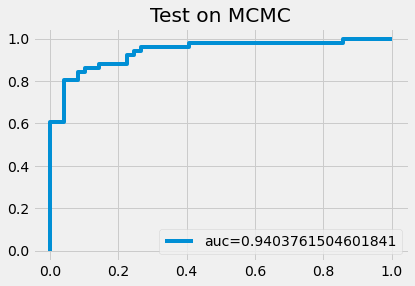

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

predict_prob =  predict(w_sample_MCMC, X_test)
fpr, tpr, _ = roc_curve(y_test, predict_prob)
auc = roc_auc_score(y_test, predict_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Test on MCMC")

In [12]:
# VI and assess performance
# Follow instructions from case study material Variational Inference - Bayesian Linear Regression.ipynb

def calculate_elbo(D, m, S, alpha, beta, alpha_o, beta_o, l_like, x, y):
    joint_1 = (.5 * np.log(l_like * .5 / np.pi)) + (-l_like * .5 * (y.T @ y)) + (l_like * ((m.T @ x.T) @ y)) + (-.5 * np.trace(((x.T @ x) @ ((m.T @ m) + S))))
        
    joint_2 = (-.5 * D * np.log(2 * np.pi)) + (D * .5 * (special.digamma(alpha) - np.log(beta))) + ((.5 * alpha / beta) * ((m.T @ m) + np.trace(S)))
        
    joint_3 = (alpha_o * np.log(beta_o)) + ((alpha_o - 1) * (special.digamma(alpha) - np.log(beta))) - (beta_o * alpha / beta) - np.log(special.gamma(alpha_o)) 
        
    var_1 = (-.5 * np.log(np.linalg.det(S))) - (D * .5 * (1 + np.log(2 * np.pi)))
    var_2 = -np.log(special.gamma(alpha)) + ((alpha - 1) * special.digamma(alpha)) + np.log(beta) - alpha
    
    elbo = joint_1 + joint_2 + joint_3 - var_1 - var_2
    return elbo

In [13]:
# Follow instructions from case study material Variational Inference - Bayesian Linear Regression.ipynb

def cavi(X_train, y_train):
    l_like = 1.
    alpha_0 = .5
    beta_0 = 0.4
    x_dim = X_train.shape[1]
    D = X_train.shape[0]

    m_initial = np.ones((x_dim))
    s_initial = np.identity(x_dim)
    alpha_initial = 0.1
    beta_initial = 0.1

    # Weight parameters:
    m = m_initial
    S = s_initial
    alpha = alpha_initial
    beta = beta_initial

    elbos = []
    prev_elbo = 0
    elbo = 1

    # do while ELBO not exceeds maximum
    while(np.absolute(elbo - prev_elbo) > 0.0001):
        prev_elbo = elbo
        # Update m and S from q(w;m,S), hold constant alpha and beta.
        # S:
        e_tau = alpha / beta
        S_inv = (e_tau * np.identity(x_dim)) + l_like * (X_train.T @ X_train)
        S = np.linalg.inv(S_inv)
        # m:  
        a = S @ X_train.T
        m = l_like * (a @ y_train)

        # Update alpha and beta from q(tau; alpha, beta), hold constant m and S.
        e_w = m.T @ m + np.trace(S)
        alpha = alpha_0 + (X_train.shape[0] * .5)
        beta = beta_0 + .5 * e_w

        # Calculate ELBO
        elbo = calculate_elbo(D, m, S, alpha, beta, alpha_0, beta_0, l_like, X_train, y_train)
        elbos.append(elbo)
        
    return stat.multivariate_normal(mean=m, cov=S)

In [14]:
# VI predictive samples
w_posterior = cavi(X_train=X_train, y_train=y_train)
w_sample_VI = w_posterior.rvs(1000)

Text(0.5, 1.0, 'Test on VI')

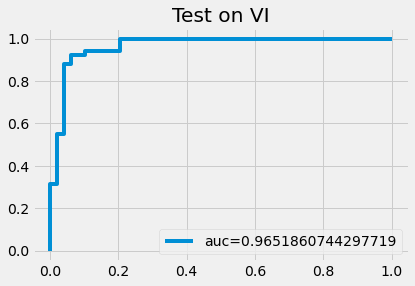

In [15]:
predict_prob =  predict(w_sample_VI, X_test)
fpr, tpr, _ = roc_curve(y_test, predict_prob)
auc = roc_auc_score(y_test, predict_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Test on VI")

# PCA

Text(0, 0.5, 'Proportion of variance explained')

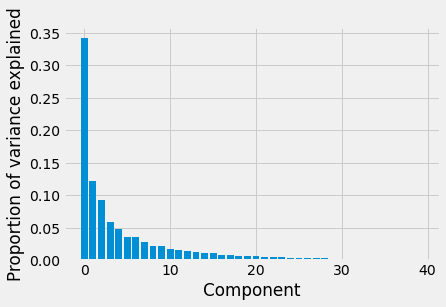

In [16]:
# TBC
# reduce the dimensionality of data
import sklearn.decomposition

# explore how many dimensions we need to capture the data
# PCA
pca = sklearn.decomposition.PCA(n_components=40).fit(X_train)
plt.bar(np.arange(40), pca.explained_variance_ratio_)
plt.xlabel("Component")
plt.ylabel("Proportion of variance explained")

In [17]:
pca = sklearn.decomposition.PCA(n_components=30).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [18]:
# try MCMC again on decomposed dataset

initial_sample_prior = w_sample_prior(X_train_pca)
w_sample_MCMC_pca = metropolis_hastings(log_prior=log_prior, log_likelihood=log_likelihood, 
                               w_sample_prior=initial_sample_prior, X_train=X_train_pca, y_train=y_train,
                               step_size=0.02, num_samples=1000, burning_samples=300)

accept 1
accept 2
accept 3
accept 4
accept 5
accept 6
accept 7
accept 8
accept 9
accept 10
accept 11
accept 12
accept 13
accept 14
accept 15
accept 16
accept 17
accept 18
accept 19
accept 20
accept 21
accept 22
accept 23
accept 24
accept 25
accept 26
accept 27
accept 28
accept 29
accept 30
accept 31
accept 32
accept 33
accept 34
accept 35
accept 36
accept 37
accept 38
accept 39
accept 40
accept 41
accept 42
accept 43
accept 44
accept 45
accept 46
accept 47
accept 48
accept 49
accept 50
accept 51
accept 52
accept 53
accept 54
accept 55
accept 56
accept 57
accept 58
accept 59
accept 60
accept 61
accept 62
accept 63
accept 64
accept 65
accept 66
accept 67
accept 68
accept 69
accept 70
accept 71
accept 72
accept 73
accept 74
accept 75
accept 76
accept 77
accept 78
accept 79
accept 80
accept 81
accept 82
accept 83
accept 84
accept 85
accept 86
accept 87
accept 88
accept 89
accept 90
accept 91
accept 92
accept 93
accept 94
accept 95
accept 96
accept 97
accept 98
accept 99
accept 100
accept 1

accept 759
accept 760
accept 761
accept 762
accept 763
accept 764
accept 765
accept 766
accept 767
accept 768
accept 769
accept 770
accept 771
accept 772
accept 773
accept 774
accept 775
accept 776
accept 777
accept 778
accept 779
accept 780
accept 781
accept 782
accept 783
accept 784
accept 785
accept 786
accept 787
accept 788
accept 789
accept 790
accept 791
accept 792
accept 793
accept 794
accept 795
accept 796
accept 797
accept 798
accept 799
accept 800
accept 801
accept 802
accept 803
accept 804
accept 805
accept 806
accept 807
accept 808
accept 809
accept 810
accept 811
accept 812
accept 813
accept 814
accept 815
accept 816
accept 817
accept 818
accept 819
accept 820
accept 821
accept 822
accept 823
accept 824
accept 825
accept 826
accept 827
accept 828
accept 829
accept 830
accept 831
accept 832
accept 833
accept 834
accept 835
accept 836
accept 837
accept 838
accept 839
accept 840
accept 841
accept 842
accept 843
accept 844
accept 845
accept 846
accept 847
accept 848
accept 849

Text(0.5, 1.0, 'Test on MCMC(PCA)')

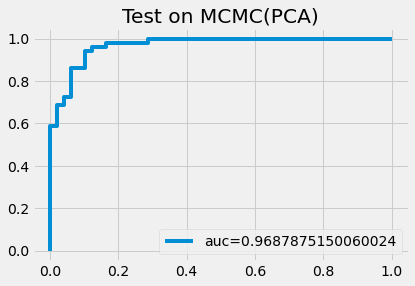

In [19]:

predict_prob =  predict(w_sample_MCMC_pca, X_test_pca)
fpr, tpr, _ = roc_curve(y_test, predict_prob)
auc = roc_auc_score(y_test, predict_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Test on MCMC(PCA)")

Text(0.5, 1.0, 'Test on VI(PCA)')

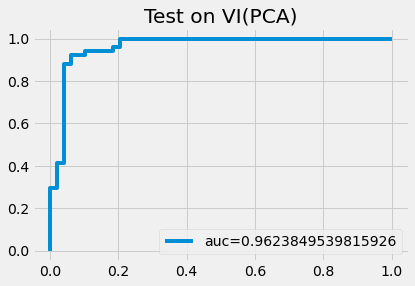

In [20]:

w_posterior_pca = cavi(X_train_pca, y_train)
w_sample_VI_pca = w_posterior_pca.rvs(1000)

predict_prob =  predict(w_sample_VI_pca, X_test_pca)
fpr, tpr, _ = roc_curve(y_test, predict_prob)
auc = roc_auc_score(y_test, predict_prob)
#     auc_list.append(auc)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Test on VI(PCA)")
# print(max(auc_list))
# print(np.argmax(auc_list))

# UMAP

In [21]:
# UMAP
import umap

umap  = umap.UMAP(min_dist=0.25).fit(X_train)
X_train_2d = umap.transform(X_train)
X_test_2d = umap.transform(X_test)

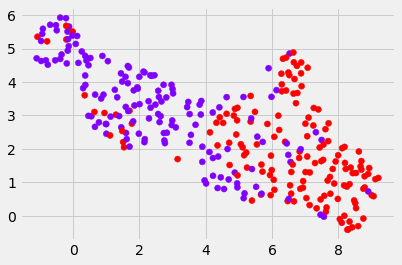

In [22]:
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_train, cmap='rainbow')

In [23]:
initial_sample_prior = w_sample_prior(X_train_2d)
w_sample_MCMC_2d = metropolis_hastings(log_prior=log_prior, log_likelihood=log_likelihood, 
                               w_sample_prior=initial_sample_prior, X_train=X_train_2d, y_train=y_train,
                               step_size=0.02, num_samples=1000, burning_samples=300)

accept 1
accept 2
accept 3
accept 4
accept 5
accept 6
accept 7
accept 8
accept 9
accept 10
accept 11
accept 12
accept 13
accept 14
accept 15
accept 16
accept 17
accept 18
accept 19
accept 20
accept 21
accept 22
accept 23
accept 24
accept 25
accept 26
accept 27
accept 28
accept 29
accept 30
accept 31
accept 32
accept 33
accept 34
accept 35
accept 36
accept 37
accept 38
accept 39
accept 40
accept 41
accept 42
accept 43
accept 44
accept 45
accept 46
accept 47
accept 48
accept 49
accept 50
accept 51
accept 52
accept 53
accept 54
accept 55
accept 56
accept 57
accept 58
accept 59
accept 60
accept 61
accept 62
accept 63
accept 64
accept 65
accept 66
accept 67
accept 68
accept 69
accept 70
accept 71
accept 72
accept 73
accept 74
accept 75
accept 76
accept 77
accept 78
accept 79
accept 80
accept 81
accept 82
accept 83
accept 84
accept 85
accept 86
accept 87
accept 88
accept 89
accept 90
accept 91
accept 92
accept 93
accept 94
accept 95
accept 96
accept 97
accept 98
accept 99
accept 100
accept 1

accept 763
accept 764
accept 765
accept 766
accept 767
accept 768
accept 769
accept 770
accept 771
accept 772
accept 773
accept 774
accept 775
accept 776
accept 777
accept 778
accept 779
accept 780
accept 781
accept 782
accept 783
accept 784
accept 785
accept 786
accept 787
accept 788
accept 789
accept 790
accept 791
accept 792
accept 793
accept 794
accept 795
accept 796
accept 797
accept 798
accept 799
accept 800
accept 801
accept 802
accept 803
accept 804
accept 805
accept 806
accept 807
accept 808
accept 809
accept 810
accept 811
accept 812
accept 813
accept 814
accept 815
accept 816
accept 817
accept 818
accept 819
accept 820
accept 821
accept 822
accept 823
accept 824
accept 825
accept 826
accept 827
accept 828
accept 829
accept 830
accept 831
accept 832
accept 833
accept 834
accept 835
accept 836
accept 837
accept 838
accept 839
accept 840
accept 841
accept 842
accept 843
accept 844
accept 845
accept 846
accept 847
accept 848
accept 849
accept 850
accept 851
accept 852
accept 853

Text(0.5, 1.0, 'Test on MCMC(UMAP)')

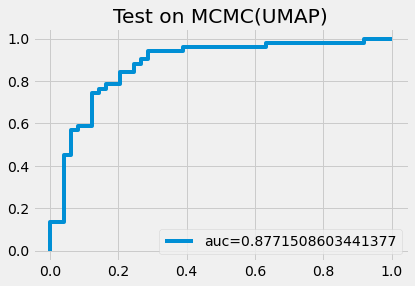

In [24]:

predict_prob =  predict(w_sample_MCMC_2d, X_test_2d)
fpr, tpr, _ = roc_curve(y_test, predict_prob)
auc = roc_auc_score(y_test, predict_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Test on MCMC(UMAP)")

Text(0.5, 1.0, 'Test on VI(UMAP)')

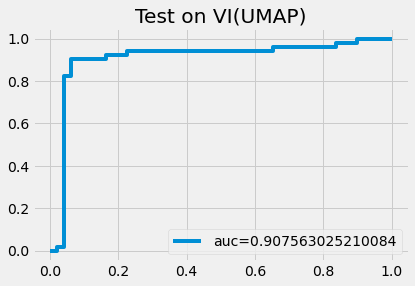

In [25]:
w_posterior_umap = cavi(X_train_2d, y_train)
w_sample_VI_umap = w_posterior_umap.rvs(1000)

predict_prob =  predict(w_sample_VI_umap, X_test_2d)
fpr, tpr, _ = roc_curve(y_test, predict_prob)
auc = roc_auc_score(y_test, predict_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Test on VI(UMAP)")

# TSNE

In [26]:
import sklearn.manifold

tsne = sklearn.manifold.TSNE().fit(X_train)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

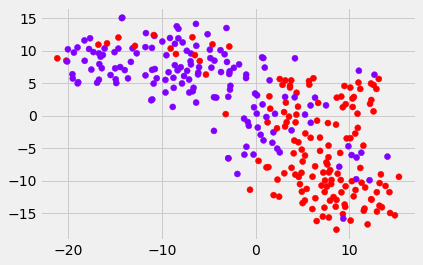

In [27]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=y_train, cmap='rainbow')

In [28]:
initial_sample_prior = w_sample_prior(X_train_tsne)
w_sample_MCMC_tsne = metropolis_hastings(log_prior=log_prior, log_likelihood=log_likelihood, 
                               w_sample_prior=initial_sample_prior, X_train=X_train_tsne, y_train=y_train,
                               step_size=0.02, num_samples=1000, burning_samples=300)

<ipython-input-8-aa9307bd7ad7>:39: RuntimeWarning: overflow encountered in exp
  ratio = np.exp(p_w_prime - p_w)


accept 1
accept 2
accept 3
accept 4
accept 5
accept 6
accept 7
accept 8
accept 9
accept 10
accept 11
accept 12
accept 13
accept 14
accept 15
accept 16
accept 17
accept 18
accept 19
accept 20
accept 21
accept 22
accept 23
accept 24
accept 25
accept 26
accept 27
accept 28
accept 29
accept 30
accept 31
accept 32
accept 33
accept 34
accept 35
accept 36
accept 37
accept 38
accept 39
accept 40
accept 41
accept 42
accept 43
accept 44
accept 45
accept 46
accept 47
accept 48
accept 49
accept 50
accept 51
accept 52
accept 53
accept 54
accept 55
accept 56
accept 57
accept 58
accept 59
accept 60
accept 61
accept 62
accept 63
accept 64
accept 65
accept 66
accept 67
accept 68
accept 69
accept 70
accept 71
accept 72
accept 73
accept 74
accept 75
accept 76
accept 77
accept 78
accept 79
accept 80
accept 81
accept 82
accept 83
accept 84
accept 85
accept 86
accept 87
accept 88
accept 89
accept 90
accept 91
accept 92
accept 93
accept 94
accept 95
accept 96
accept 97
accept 98
accept 99
accept 100
accept 1

accept 760
accept 761
accept 762
accept 763
accept 764
accept 765
accept 766
accept 767
accept 768
accept 769
accept 770
accept 771
accept 772
accept 773
accept 774
accept 775
accept 776
accept 777
accept 778
accept 779
accept 780
accept 781
accept 782
accept 783
accept 784
accept 785
accept 786
accept 787
accept 788
accept 789
accept 790
accept 791
accept 792
accept 793
accept 794
accept 795
accept 796
accept 797
accept 798
accept 799
accept 800
accept 801
accept 802
accept 803
accept 804
accept 805
accept 806
accept 807
accept 808
accept 809
accept 810
accept 811
accept 812
accept 813
accept 814
accept 815
accept 816
accept 817
accept 818
accept 819
accept 820
accept 821
accept 822
accept 823
accept 824
accept 825
accept 826
accept 827
accept 828
accept 829
accept 830
accept 831
accept 832
accept 833
accept 834
accept 835
accept 836
accept 837
accept 838
accept 839
accept 840
accept 841
accept 842
accept 843
accept 844
accept 845
accept 846
accept 847
accept 848
accept 849
accept 850

Text(0.5, 1.0, 'Test on MCMC(TSNE)')

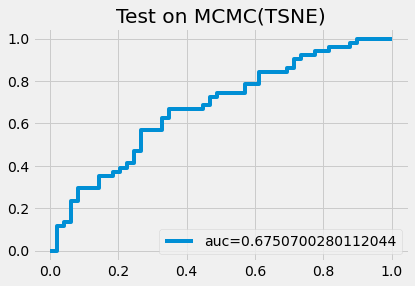

In [29]:

predict_prob =  predict(w_sample_MCMC_tsne, X_test_tsne)
fpr, tpr, _ = roc_curve(y_test, predict_prob)
auc = roc_auc_score(y_test, predict_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Test on MCMC(TSNE)")

Text(0.5, 1.0, 'Test on VI(TSNE)')

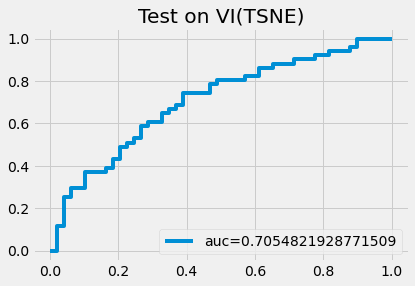

In [30]:
w_posterior_tsne = cavi(X_train_tsne, y_train)
w_sample_VI_tsne = w_posterior_tsne.rvs(1000)

predict_prob =  predict(w_sample_VI_tsne, X_test_tsne)
fpr, tpr, _ = roc_curve(y_test, predict_prob)
auc = roc_auc_score(y_test, predict_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Test on VI(TSNE)")

# LLE

In [31]:
import sklearn.manifold

lle = sklearn.manifold.LocallyLinearEmbedding(n_neighbors=38).fit(X_train)
X_train_lle = lle.transform(X_train)
X_test_lle = lle.transform(X_test)

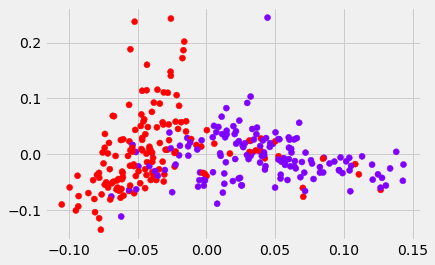

In [32]:
plt.scatter(X_train_lle[:,0], X_train_lle[:,1], c=y_train, cmap='rainbow')

In [33]:
initial_sample_prior = w_sample_prior(X_train_lle)
w_sample_MCMC_lle = metropolis_hastings(log_prior=log_prior, log_likelihood=log_likelihood, 
                               w_sample_prior=initial_sample_prior, X_train=X_train_lle, y_train=y_train,
                               step_size=0.02, num_samples=1000, burning_samples=300)

accept 1
accept 2
accept 3
accept 4
accept 5
accept 6
accept 7
accept 8
accept 9
accept 10
accept 11
accept 12
accept 13
accept 14
accept 15
accept 16
accept 17
accept 18
accept 19
accept 20
accept 21
accept 22
accept 23
accept 24
accept 25
accept 26
accept 27
accept 28
accept 29
accept 30
accept 31
accept 32
accept 33
accept 34
accept 35
accept 36
accept 37
accept 38
accept 39
accept 40
accept 41
accept 42
accept 43
accept 44
accept 45
accept 46
accept 47
accept 48
accept 49
accept 50
accept 51
accept 52
accept 53
accept 54
accept 55
accept 56
accept 57
accept 58
accept 59
accept 60
accept 61
accept 62
accept 63
accept 64
accept 65
accept 66
accept 67
accept 68
accept 69
accept 70
accept 71
accept 72
accept 73
accept 74
accept 75
accept 76
accept 77
accept 78
accept 79
accept 80
accept 81
accept 82
accept 83
accept 84
accept 85
accept 86
accept 87
accept 88
accept 89
accept 90
accept 91
accept 92
accept 93
accept 94
accept 95
accept 96
accept 97
accept 98
accept 99
accept 100
accept 1

accept 789
accept 790
accept 791
accept 792
accept 793
accept 794
accept 795
accept 796
accept 797
accept 798
accept 799
accept 800
accept 801
accept 802
accept 803
accept 804
accept 805
accept 806
accept 807
accept 808
accept 809
accept 810
accept 811
accept 812
accept 813
accept 814
accept 815
accept 816
accept 817
accept 818
accept 819
accept 820
accept 821
accept 822
accept 823
accept 824
accept 825
accept 826
accept 827
accept 828
accept 829
accept 830
accept 831
accept 832
accept 833
accept 834
accept 835
accept 836
accept 837
accept 838
accept 839
accept 840
accept 841
accept 842
accept 843
accept 844
accept 845
accept 846
accept 847
accept 848
accept 849
accept 850
accept 851
accept 852
accept 853
accept 854
accept 855
accept 856
accept 857
accept 858
accept 859
accept 860
accept 861
accept 862
accept 863
accept 864
accept 865
accept 866
accept 867
accept 868
accept 869
accept 870
accept 871
accept 872
accept 873
accept 874
accept 875
accept 876
accept 877
accept 878
accept 879

Text(0.5, 1.0, 'Test on MCMC(LLE)')

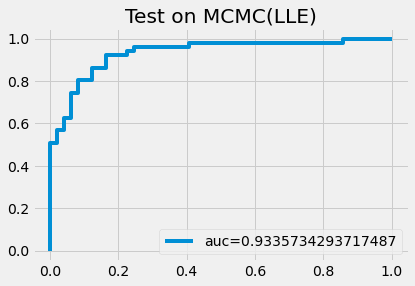

In [34]:

predict_prob =  predict(w_sample_MCMC_lle, X_test_lle)
fpr, tpr, _ = roc_curve(y_test, predict_prob)
auc = roc_auc_score(y_test, predict_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Test on MCMC(LLE)")

Text(0.5, 1.0, 'Test on VI(LLE)')

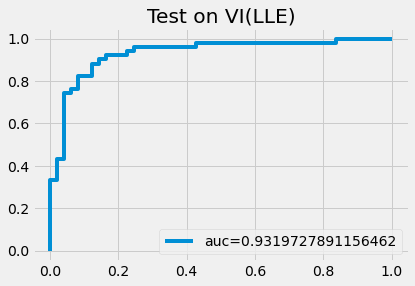

In [35]:
w_posterior_lle = cavi(X_train_lle, y_train)
w_sample_VI_lle = w_posterior_lle.rvs(1000)

predict_prob =  predict(w_sample_VI_lle, X_test_lle)
fpr, tpr, _ = roc_curve(y_test, predict_prob)
auc = roc_auc_score(y_test, predict_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Test on VI(LLE)")

# ISOMAP

In [36]:
isomap = sklearn.manifold.Isomap(n_neighbors=38).fit(X_train)
X_train_isomap = isomap.transform(X_train)
X_test_isomap = isomap.transform(X_test)

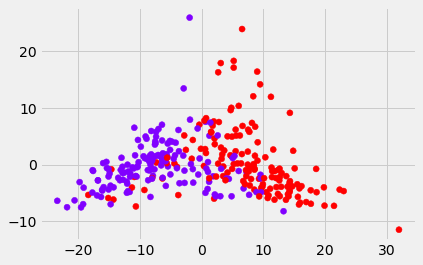

In [37]:
plt.scatter(X_train_isomap[:,0], X_train_isomap[:,1], c=y_train, cmap='rainbow')

In [38]:
initial_sample_prior = w_sample_prior(X_train_isomap)
w_sample_MCMC_isomap = metropolis_hastings(log_prior=log_prior, log_likelihood=log_likelihood, 
                               w_sample_prior=initial_sample_prior, X_train=X_train_isomap, y_train=y_train,
                               step_size=0.02, num_samples=1000, burning_samples=300)

accept 1
accept 2
accept 3
accept 4
accept 5
accept 6
accept 7
accept 8
accept 9
accept 10
accept 11
accept 12
accept 13
accept 14
accept 15
accept 16
accept 17
accept 18
accept 19
accept 20
accept 21
accept 22
accept 23
accept 24
accept 25
accept 26
accept 27
accept 28
accept 29
accept 30
accept 31
accept 32
accept 33
accept 34
accept 35
accept 36
accept 37
accept 38
accept 39
accept 40
accept 41
accept 42
accept 43
accept 44
accept 45
accept 46
accept 47
accept 48
accept 49
accept 50
accept 51
accept 52
accept 53
accept 54
accept 55
accept 56
accept 57
accept 58
accept 59
accept 60
accept 61
accept 62
accept 63
accept 64
accept 65
accept 66
accept 67
accept 68
accept 69
accept 70
accept 71
accept 72
accept 73
accept 74
accept 75
accept 76
accept 77
accept 78
accept 79
accept 80
accept 81
accept 82
accept 83
accept 84
accept 85
accept 86
accept 87
accept 88
accept 89
accept 90
accept 91
accept 92
accept 93
accept 94
accept 95
accept 96
accept 97
accept 98
accept 99
accept 100
accept 1

accept 762
accept 763
accept 764
accept 765
accept 766
accept 767
accept 768
accept 769
accept 770
accept 771
accept 772
accept 773
accept 774
accept 775
accept 776
accept 777
accept 778
accept 779
accept 780
accept 781
accept 782
accept 783
accept 784
accept 785
accept 786
accept 787
accept 788
accept 789
accept 790
accept 791
accept 792
accept 793
accept 794
accept 795
accept 796
accept 797
accept 798
accept 799
accept 800
accept 801
accept 802
accept 803
accept 804
accept 805
accept 806
accept 807
accept 808
accept 809
accept 810
accept 811
accept 812
accept 813
accept 814
accept 815
accept 816
accept 817
accept 818
accept 819
accept 820
accept 821
accept 822
accept 823
accept 824
accept 825
accept 826
accept 827
accept 828
accept 829
accept 830
accept 831
accept 832
accept 833
accept 834
accept 835
accept 836
accept 837
accept 838
accept 839
accept 840
accept 841
accept 842
accept 843
accept 844
accept 845
accept 846
accept 847
accept 848
accept 849
accept 850
accept 851
accept 852

Text(0.5, 1.0, 'Test on MCMC(ISOMAP)')

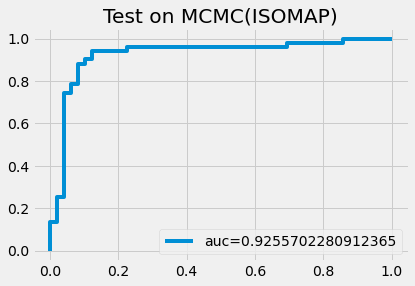

In [39]:
predict_prob =  predict(w_sample_MCMC_isomap, X_test_isomap)
fpr, tpr, _ = roc_curve(y_test, predict_prob)
auc = roc_auc_score(y_test, predict_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Test on MCMC(ISOMAP)")

Text(0.5, 1.0, 'Test on VI(ISOMAP)')

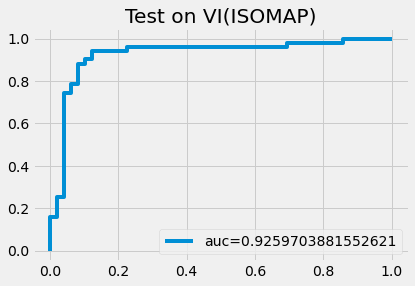

In [40]:
w_posterior_isomap = cavi(X_train_isomap, y_train)
w_sample_VI_isomap = w_posterior_isomap.rvs(1000)

predict_prob =  predict(w_sample_VI_isomap, X_test_isomap)
fpr, tpr, _ = roc_curve(y_test, predict_prob)
auc = roc_auc_score(y_test, predict_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Test on VI(ISOMAP)")

# Try PYMC

In [41]:
# try PYMC
import pymc3 as pm

with pm.Model() as model:
    X = X_train
#     X = X_train_2d
#     X = X_train_isomap
#     X = X_train_lle
#     X = X_train_pca
#     X = X_train_tsne
    mu = np.zeros(X.shape[1])
    cov = np.identity(X.shape[1])
    weights = pm.MvNormal("weights", mu=mu, cov=cov, shape=X.shape[1])
    y_out = pm.Bernoulli("y_out", p=pm.math.sigmoid(pm.math.dot(X, weights)), observed=y_train)

In [49]:
with model:
    step = pm.Metropolis() 
    w_trace_MC = pm.sample(1000, step=step) 

<ipython-input-49-f453e5ce9cef>:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  w_trace_MC = pm.sample(1000, step=step)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [weights]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [43]:
with model:
    inference = pm.ADVI()
    approx = pm.fit(n=10000, method=inference)
    w_trace_VI = approx.sample()

Finished [100%]: Average Loss = 239.74


In [50]:
w_pm_MC = w_trace_MC.get_values(weights)
w_pm_VI = w_trace_VI.get_values(weights)

Text(0.5, 1.0, 'Test on MCMC(PYMC)')

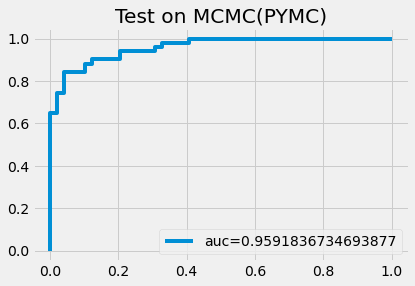

In [51]:
predict_prob =  predict(w_pm_MC, X_test)
fpr, tpr, _ = roc_curve(y_test, predict_prob)
auc = roc_auc_score(y_test, predict_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Test on MCMC(PYMC)")

Text(0.5, 1.0, 'Test on VI(PYMC)')

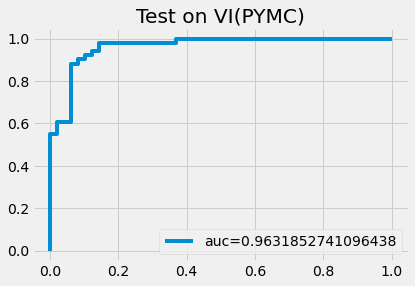

In [48]:
predict_prob =  predict(w_pm_VI, X_test)
fpr, tpr, _ = roc_curve(y_test, predict_prob)
auc = roc_auc_score(y_test, predict_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Test on VI(PYMC)")